[-11.74406268   4.8478638    3.25472294]


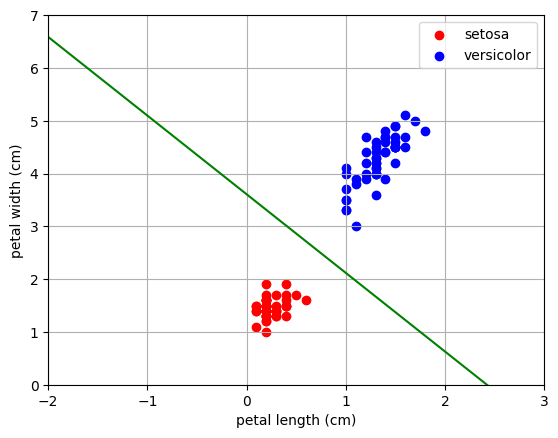

In [6]:
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline


class Logistic_Regression:
    def sigmoid(self, t):
        return 1 / (1 + np.exp(-t))

    def __init__(self, X, Y):
        self.X = np.insert(X, 0, [1] * X.shape[0], axis=1)
        self.Y = Y
        self.b = np.zeros((self.X[0].shape[0]))

    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        p = len(Y)

        sum = np.zeros((len(self.b)))
        for i, x in enumerate(self.X):
            temp = 0
            for j, k in enumerate(self.X[i]):
                temp += self.b[j] * k
            for coef in range(len(x)):
                sum[coef] += -(1 / p) * x[coef] * (Y[i] - self.sigmoid(temp))
        self.b -= learning_rate * sum

    def predict(self, X=None):
        Y_pred = []
        if X is None:
            X = self.X
        else:
            X = np.insert(X, 0, [1] * X.shape[0], axis=1)
        b = self.b
        for i in range(X.shape[0]):
            pred_value = np.dot(np.array(b).T, np.array(X[i]))
            Y_pred.append(pred_value)

        return Y_pred

    def compute_cost(self, Y_pred):
        p = len(self.Y)
        cross_entropy_loss = 0
        for i in range(p):
            cross_entropy_loss += -self.Y[i] * np.log(self.sigmoid(Y_pred[i])) - (
                    1 - self.Y[i]) * np.log(1 - self.sigmoid(Y_pred[i]))
        return cross_entropy_loss / p


iris = datasets.load_iris(as_frame=True)
# get labels (for 2 classes only) and features
y = iris.target
x = iris.data
y = y[y < 2]
x = x[['petal width (cm)', 'petal length (cm)']]
x = x.iloc[y.index].values
# print(x)
y = y.values.astype('float')
# print(y)

regressor = Logistic_Regression(x, y)
iterations = 0
steps = 20000
learning_rate = 0.1
costs = []

while iterations < steps:
    Y_pred = regressor.predict()
    cost = regressor.compute_cost(Y_pred)
    costs.append(cost)
    regressor.update_coeffs(learning_rate)
    # print(regressor.b)
    iterations += 1
print(regressor.b)
colors = ('r', 'b')
for target in range(2):
    plt.scatter(x[y == target, 0], x[y == target, 1],
                c=colors[target])
    plt.grid(1)
    plt.legend([iris.target_names[0], iris.target_names[1]])
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

# plot boundary
x1p = np.linspace(-50, 50, 10)

x2p = -(regressor.b[0] + regressor.b[1] * x1p) / regressor.b[2]

plt.xlim(-2, 3)
plt.ylim(0, 7)
plt.plot(x1p, x2p, c = 'g')